In [15]:
!pip install xgboost

In [16]:
#importação das bibliotetcas usadas na predição
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

#gráficos
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 

In [17]:
#visualização dos dados

df= pd.read_csv ("churn_challenge_data.csv", encoding = "UTF-8", sep = ",")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 99 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       100000 non-null  int64  
 1   churn             100000 non-null  int64  
 2   HHstatin          62077 non-null   object 
 3   actvsubs          100000 non-null  int64  
 4   adjmou            100000 non-null  float64
 5   adjqty            100000 non-null  int64  
 6   adjrev            100000 non-null  float64
 7   adults            76981 non-null   float64
 8   area              99960 non-null   object 
 9   asl_flag          100000 non-null  object 
 10  attempt_Mean      100000 non-null  float64
 11  avg3mou           100000 non-null  int64  
 12  avg3qty           100000 non-null  int64  
 13  avg3rev           100000 non-null  int64  
 14  avg6mou           97161 non-null   float64
 15  avg6qty           97161 non-null   float64
 16  avg6rev           971

,Customer_ID,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,...,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1000001,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,...,0.000000,1652,4228.00000,22.500,1504.62,0.0,0.0,6.333333,2,0.0
1,1000002,0,C,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,...,0.333333,14654,26400.00000,37.425,2851.68,1.0,0.0,61.333333,1,9.1
2,1000003,1,C,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,...,0.000000,7903,24385.05333,16.990,2155.91,0.0,0.0,2.666667,1,0.0
3,1000004,0,C,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,...,0.000000,1502,3065.00000,38.000,2000.90,0.0,0.0,0.000000,1,0.0
4,1000005,0,C,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,...,0.000000,4485,14028.00000,71.980,2181.12,0.0,0.0,77.000000,1,0.0


In [67]:
print(df['refurb_new'])

0        N
1        N
2        N
3        N
4        N
        ..
99995    N
99996    N
99997    N
99998    N
99999    N
Name: refurb_new, Length: 100000, dtype: object


In [18]:
df.duplicated().sum()

0

In [19]:
df.isna().sum()

Customer_ID          0
churn                0
HHstatin         37923
actvsubs             0
adjmou               0
                 ...  
truck             1732
unan_dat_Mean        0
unan_vce_Mean        0
uniqsubs             0
vceovr_Mean        357
Length: 99, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

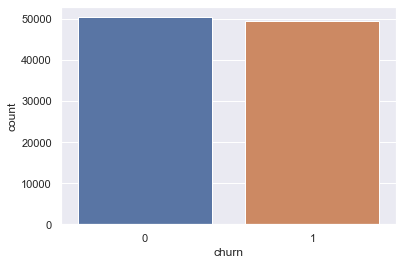

In [20]:
df['churn'].value_counts()
sns.countplot(df['churn'])

<AxesSubplot:xlabel='prizm_social_one', ylabel='count'>

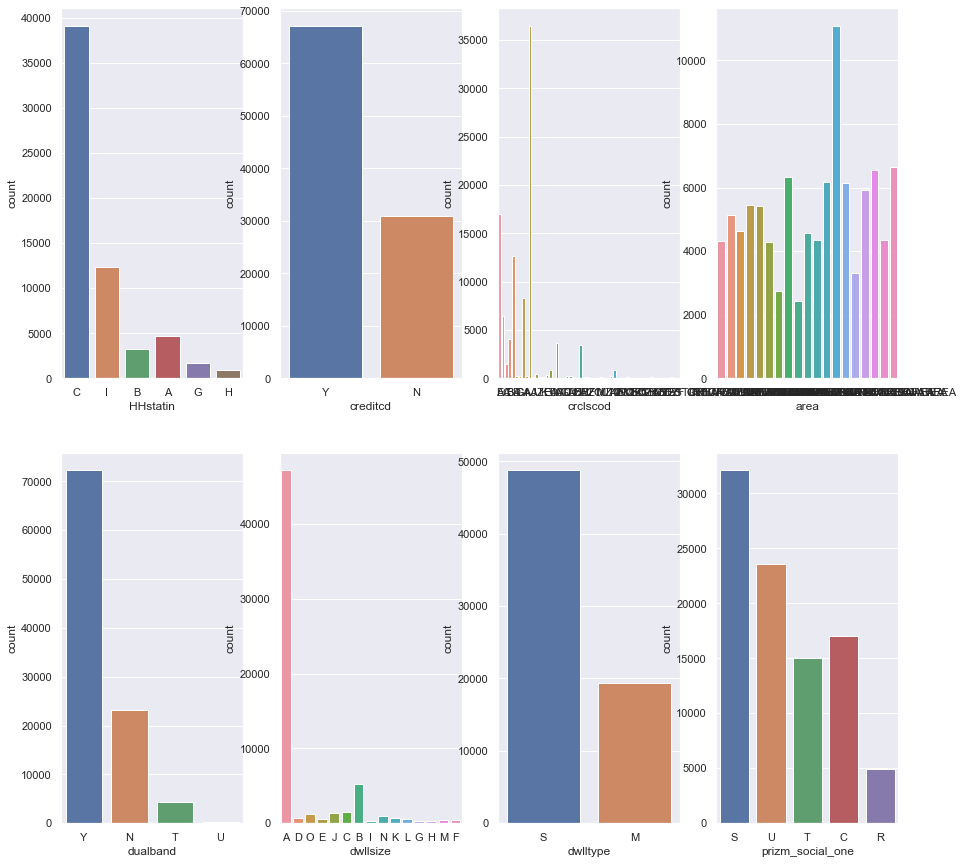

In [21]:
#visualização de variavéis

f, ax = plt.subplots(2,4, figsize=(15,15))

sns.countplot(df['HHstatin'], ax=ax[0,0])
sns.countplot(df['creditcd'], ax=ax[0,1])
sns.countplot(df['crclscod'], ax=ax[0,2])
sns.countplot(df['area'], ax=ax[0,3])
sns.countplot(df['dualband'], ax=ax[1,0])
sns.countplot(df['dwllsize'], ax=ax[1,1])
sns.countplot(df['dwlltype'], ax=ax[1,2])
sns.countplot(df['prizm_social_one'], ax=ax[1,3])


In [60]:
df.corr()

,level_0,index,churn,actvsubs,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,...,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
level_0,1.000000,1.000000,-0.042764,-0.029977,-0.276216,-0.297841,-0.478197,-0.012623,0.072852,0.096099,...,0.059226,-0.297798,-0.275945,0.060932,-0.468064,-0.099237,0.019113,0.090069,-0.014418,0.031738
index,1.000000,1.000000,-0.042764,-0.029977,-0.276216,-0.297841,-0.478197,-0.012623,0.072852,0.096099,...,0.059226,-0.297798,-0.275945,0.060932,-0.468064,-0.099237,0.019113,0.090069,-0.014418,0.031738
churn,-0.042764,-0.042764,1.000000,0.019686,-0.017532,-0.016259,-0.002900,-0.007968,-0.048533,-0.049546,...,-0.030657,-0.015780,-0.016949,-0.068558,-0.003017,-0.004097,-0.004727,-0.035560,0.039882,0.024240
actvsubs,-0.029977,-0.029977,0.019686,1.000000,-0.017946,0.007781,-0.003066,0.074733,-0.046474,-0.058065,...,-0.023159,0.009558,-0.016039,-0.060243,-0.002104,0.067156,-0.006427,-0.041239,0.774229,-0.022268
adjmou,-0.276216,-0.276216,-0.017532,-0.017946,1.000000,0.925759,0.835433,-0.016810,0.573811,0.673897,...,0.157981,0.925415,0.999747,0.477878,0.836831,-0.015695,0.024827,0.426040,0.004428,0.285282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
truck,-0.099237,-0.099237,-0.004097,0.067156,-0.015695,0.003004,0.006306,0.260806,-0.045315,-0.055779,...,-0.047923,0.002668,-0.016127,-0.035703,0.004698,1.000000,-0.000725,-0.035852,0.039461,-0.029295
unan_dat_Mean,0.019113,0.019113,-0.004727,-0.006427,0.024827,0.019697,0.014618,0.000251,0.065626,0.058070,...,0.009911,0.019731,0.024911,0.041625,0.015676,-0.000725,1.000000,0.040617,-0.004498,0.030650
unan_vce_Mean,0.090069,0.090069,-0.035560,-0.041239,0.426040,0.417155,0.255430,-0.002707,0.859078,0.644434,...,0.306248,0.417296,0.426211,0.358530,0.258813,-0.035852,0.040617,1.000000,-0.018772,0.351720
uniqsubs,-0.014418,-0.014418,0.039882,0.774229,0.004428,0.020395,0.008911,0.059803,-0.020571,-0.024451,...,-0.014284,0.022994,0.007589,-0.025429,0.011241,0.039461,-0.004498,-0.018772,1.000000,-0.008519


<AxesSubplot:>

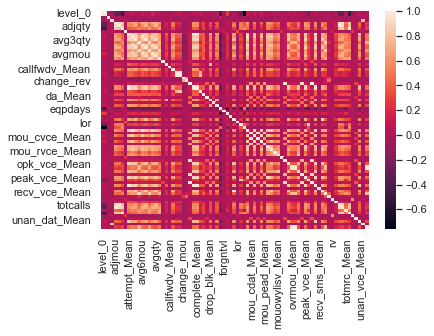

In [61]:
sns.heatmap(df.corr())

In [58]:
df.describe()

# Retirando ID

def _assert_all_finite(X):
    """Like assert_all_finite, but only for ndarray."""
    X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method.
    if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
            and not np.isfinite(X).all()):
        raise ValueError("Input contains NaN, infinity"
                         " or a value too large for %r." % X.dtype)



In [35]:
df_onehot=pd.get_dummies(df)

df_onehot.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,avg3qty,avg3rev,...,new_cell_Y,ownrent_O,ownrent_R,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,refurb_new_N,refurb_new_R
0,1,1,4085.00,1602,1453.44,1.0,52.333333,272,116,30,...,0,1,0,0,0,1,0,0,1,0
1,0,1,26367.00,14624,2833.88,1.0,263.333333,305,158,40,...,0,0,0,0,0,0,0,1,1,0
2,1,1,24303.05,7888,1934.47,2.0,9.000000,12,7,17,...,1,1,0,0,0,1,0,0,1,0
3,0,1,3035.00,1479,1941.81,4.0,3.666667,8,3,38,...,1,0,0,0,0,0,1,0,1,0
4,0,1,13965.00,4452,2166.48,1.0,222.333333,558,191,55,...,1,0,1,0,0,0,0,1,1,0


In [53]:
#Escala

scaler = MinMaxScaler()

df_onehot['uniqsubs'] = scaler.fit_transform(df_onehot['uniqsubs'].values.reshape(-1,1))
df_onehot['totcalls'] = scaler.fit_transform(df_onehot['totcalls'].values.reshape(-1,1))
df_onehot['months'] = scaler.fit_transform(df_onehot['months'].values.reshape(-1,1))
df_onehot['avg3rev'] = scaler.fit_transform(df_onehot['avg3rev'].values.reshape(-1,1))
df_onehot['avg3qty'] = scaler.fit_transform(df_onehot['avg3qty'].values.reshape(-1,1))
df_onehot['avg3mou'] = scaler.fit_transform(df_onehot['avg3mou'].values.reshape(-1,1))
df_onehot['adjqty'] = scaler.fit_transform(df_onehot['adjqty'].values.reshape(-1,1))



In [54]:
#separando teste e treino

X = df_onehot.drop(['churn'],axis=1)
y = df_onehot['churn'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [66]:
print(df['HHstatin'])

0          C
1          C
2          C
3          C
4          C
        ... 
99995    NaN
99996      I
99997    NaN
99998    NaN
99999    NaN
Name: HHstatin, Length: 100000, dtype: object


In [62]:
#criando modelo
model = LogisticRegression()
model.fit(X_train, y_train)



#aplicando modelo

y_predict = model.predict(X_test)
actual_vs_predict = pd.DataFrame({'Actual':y_test.flatten(),
                                 'Prediction':y_predict.flatten()})


print(actual_vs_predict.sample(12))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').